In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df.shape

(4746, 12)

In [6]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [4]:
size = df["Size"]

In [50]:
area_m2 = round(size / 10.7639104).astype(int)
df["area_m2"] = area_m2
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_m2
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,102
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,74
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,93
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,74
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,79


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
 12  area_m2            4746 non-null   int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 463.6+ KB


In [7]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
area_m2              0
dtype: int64

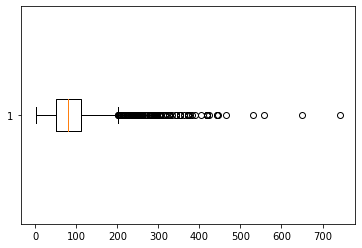

In [8]:
plt.boxplot(df["area_m2"], vert=False);

In [9]:
low, high = df["area_m2"].quantile([0.1,0.9])
mask =df["area_m2"].between(low,high)
df = df[mask]

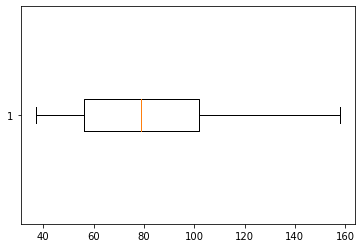

In [10]:
plt.boxplot(df["area_m2"], vert=False);

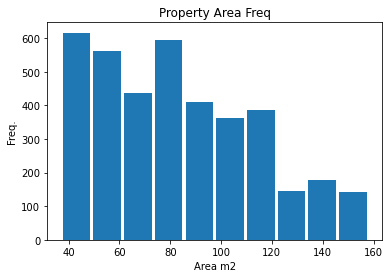

In [11]:
plt.hist(df["area_m2"], bins=10, rwidth=0.9)
plt.title("Property Area Freq"),
plt.xlabel("Area m2"),
plt.ylabel("Freq.");

In [12]:
df.mean()

C:\Users\kundan sai\AppData\Local\Temp\ipykernel_22468\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


BHK             2.006266
Rent        27335.132115
Size          891.365013
Bathroom        1.865535
area_m2        82.767363
dtype: float64

In [13]:
df.median()

C:\Users\kundan sai\AppData\Local\Temp\ipykernel_22468\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


BHK             2.0
Rent        15000.0
Size          850.0
Bathroom        2.0
area_m2        79.0
dtype: float64

In [14]:
df.mode()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_m2
0,2022-07-06,2,15000,1000,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner,93


In [15]:
df.describe()

,BHK,Rent,Size,Bathroom,area_m2
count,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000
mean,2.006266,27335.132115,891.365013,1.865535,82.767363
std,0.698439,35820.151230,333.115592,0.698420,30.950916
min,1.000000,1800.000000,400.000000,1.000000,37.000000
25%,2.000000,10000.000000,600.000000,1.000000,56.000000
50%,2.000000,15000.000000,850.000000,2.000000,79.000000
75%,2.000000,28375.000000,1100.000000,2.000000,102.000000
max,6.000000,600000.000000,1705.000000,6.000000,158.000000


In [16]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_m2
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,102
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,74
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,93
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,74
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner,97
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,125
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,93
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,139


<AxesSubplot:>

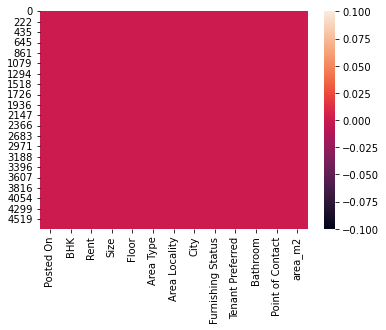

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.corr()

,BHK,Rent,Size,Bathroom,area_m2
BHK,1.000000,0.369564,0.730533,0.712189,0.730755
Rent,0.369564,1.000000,0.296898,0.491944,0.297239
Size,0.730533,0.296898,1.000000,0.666332,0.999957
Bathroom,0.712189,0.491944,0.666332,1.000000,0.666689
area_m2,0.730755,0.297239,0.999957,0.666689,1.000000


In [8]:
df.Floor.value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

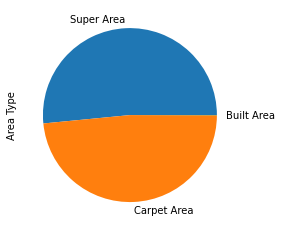

In [18]:
df['Area Type'].value_counts().plot.pie()
plt.show()

Text(0, 0.5, 'Frequency')

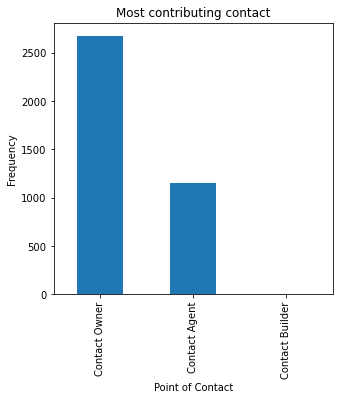

In [19]:
ax = df['Point of Contact'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Most contributing contact")
ax.set_xlabel("Point of Contact")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

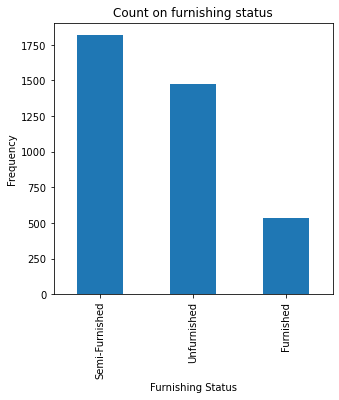

In [20]:
ax =df['Furnishing Status'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

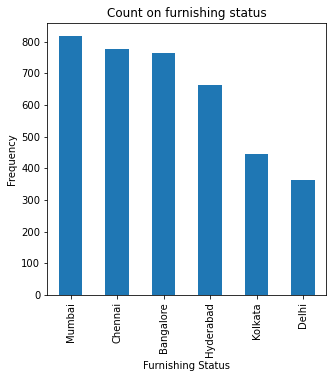

In [21]:
ax = df['City'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

<AxesSubplot:>

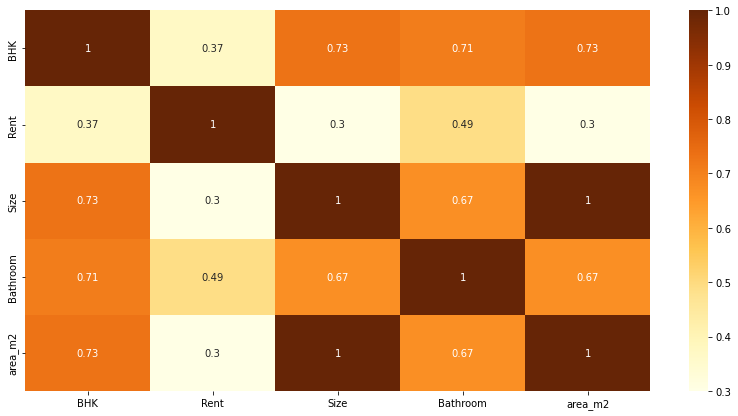

In [22]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<AxesSubplot:xlabel='Point of Contact', ylabel='count'>

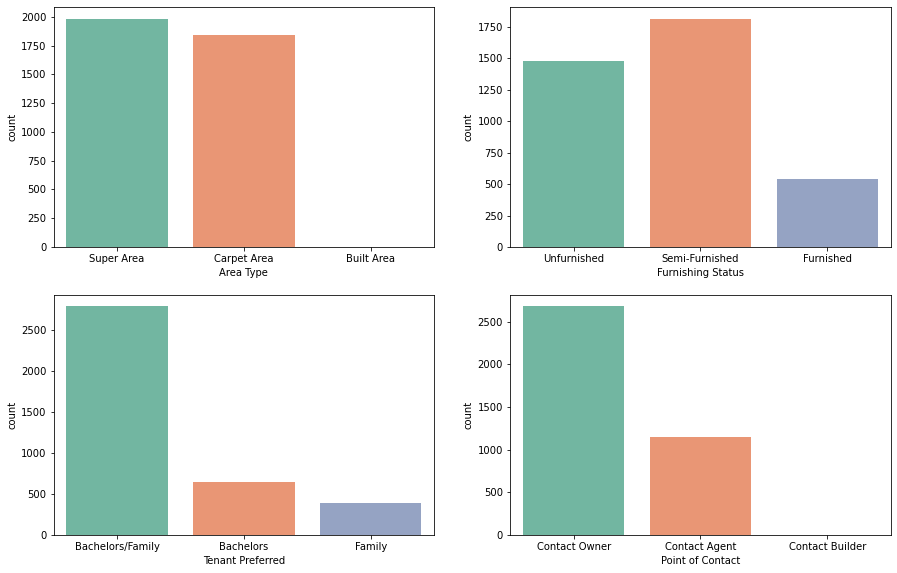

In [23]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Area Type', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Furnishing Status', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Tenant Preferred', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Point of Contact', palette='Set2', data = df)

<AxesSubplot:xlabel='City', ylabel='Rent'>

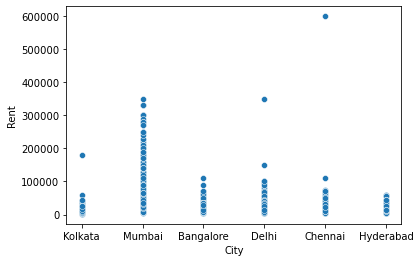

In [24]:
sns.scatterplot(x = "City", y = "Rent",data = df,)

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

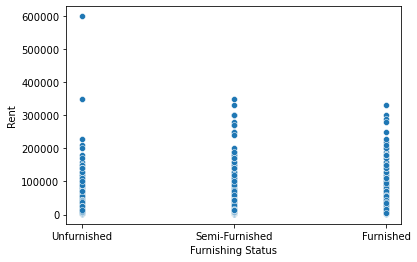

In [25]:
sns.scatterplot(x = "Furnishing Status", y = "Rent", data = df)

In [26]:
df['City'].value_counts()

Mumbai       818
Chennai      778
Bangalore    763
Hyderabad    664
Kolkata      445
Delhi        362
Name: City, dtype: int64

In [27]:
df['Rent'].value_counts()

15000    245
12000    222
10000    215
20000    149
8000     135
        ... 
84000      1
51500      1
59000      1
77500      1
5800       1
Name: Rent, Length: 207, dtype: int64

### Multivariate analysis

### Area Type vs City vs Bathroom

In [29]:
res=pd.pivot_table(data=df,index="Area Type",columns="City",values="Bathroom")
res

City,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Area Type,,,,,,
Built Area,NaN,2.000000,NaN,1.000000,NaN,NaN
Carpet Area,1.758123,2.056391,1.745192,2.011696,1.484305,2.27937
Super Area,1.654321,1.825832,1.584416,1.951220,1.463964,1.77500


<AxesSubplot:xlabel='City', ylabel='Area Type'>

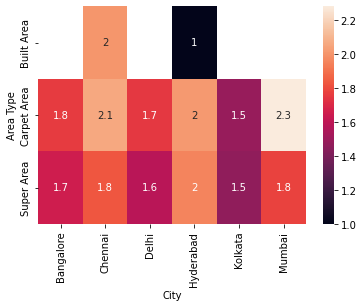

In [30]:
sns.heatmap(res,annot=True)

### City vs Tenant Preferred vs Bathroom

In [31]:
res=pd.pivot_table(data=df,index="City",columns="Tenant Preferred",values="Bathroom")
res

Tenant Preferred,Bachelors,Bachelors/Family,Family
City,,,
Bangalore,1.743119,1.666667,1.895833
Chennai,2.047170,1.856649,2.043011
Delhi,1.792079,1.624506,1.875000
Hyderabad,1.886076,1.943182,2.280702
Kolkata,1.452830,1.468354,1.652174
Mumbai,2.103448,2.195312,2.329193


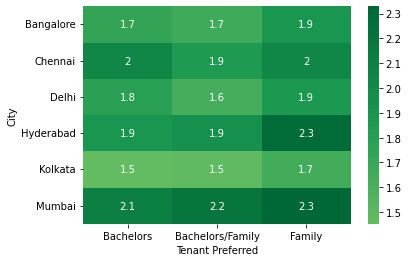

In [32]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

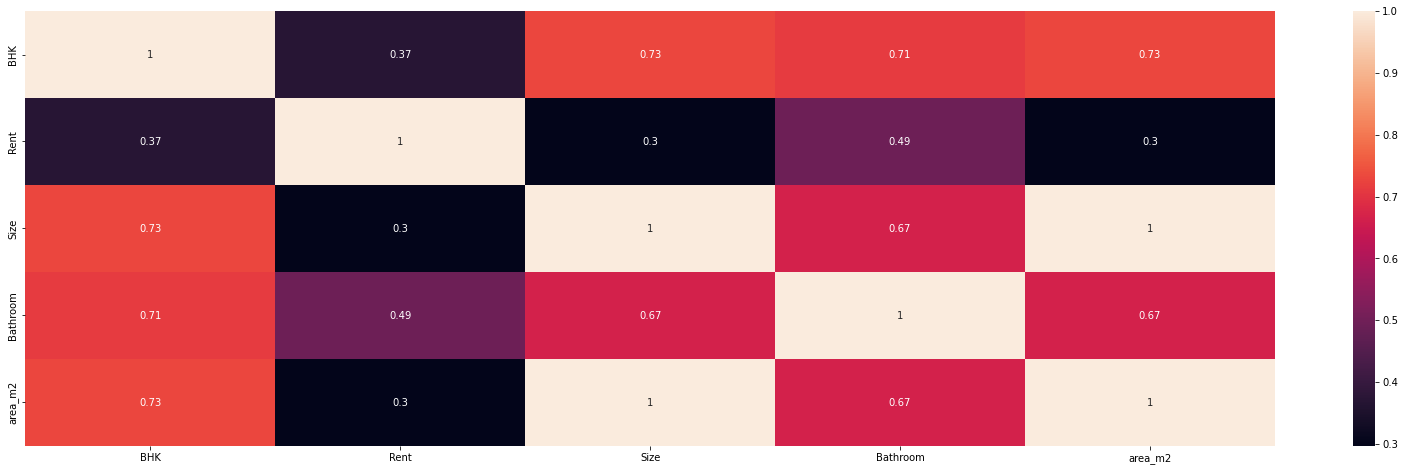

In [33]:
plt.subplots(figsize=(28,8))
corr = df.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


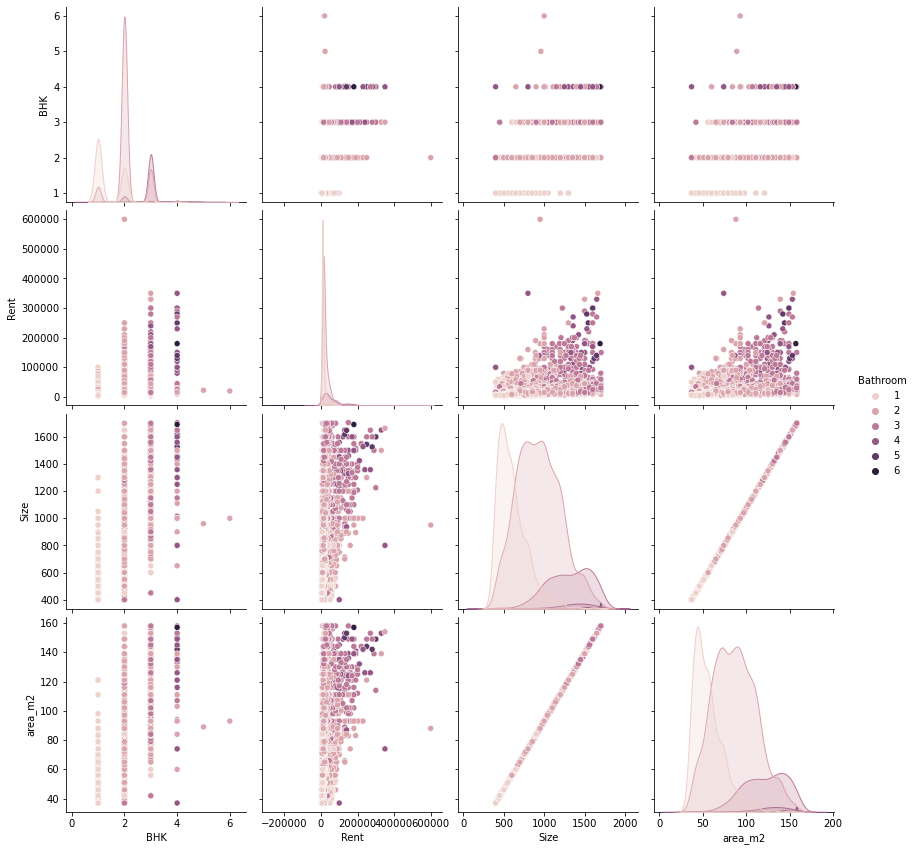

In [34]:
sns.pairplot(df,hue="Bathroom",size=3)

In [35]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [36]:
df["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [37]:
df.drop(columns = ["Tenant Preferred","BHK","Posted On", "Bathroom"], inplace=True)

In [38]:
df.drop(columns="Point of Contact", inplace=True)

In [40]:
df.head()

,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,area_m2
0,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,102
1,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,74
2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,93
3,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,74
4,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,79


In [51]:
df.area_m2.value_counts(normalize = True)

93     0.051201
56     0.047408
74     0.046566
46     0.042984
111    0.041719
         ...   
155    0.000211
272    0.000211
334    0.000211
189    0.000211
390    0.000211
Name: area_m2, Length: 252, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'plt'

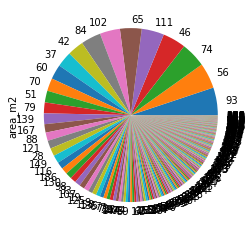

In [57]:
df.area_m2.value_counts(normalize = True).plot.pie().plt.show()